In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import io

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

#  **Reading input data**

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
np.random.seed(0)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
data = pd.read_csv("../input/fetal-health-classification/fetal_health.csv")
data.head()
data.shape

(2126, 22)

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

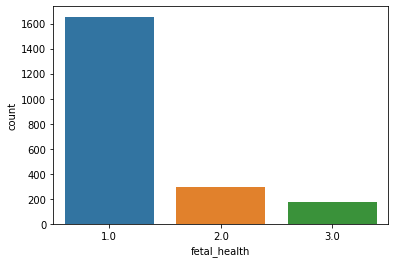

In [3]:
# Checking distribution of target variables 
sns.countplot(x = 'fetal_health' ,data = data)

In [4]:
X = data.drop(['fetal_health'], axis=1)
y = data['fetal_health']
# define oversampling strategy
oversample = RandomOverSampler()
# fit and apply the transform
X, y = oversample.fit_resample(X, y)
# reducing the dimensions to 2 
pca = PCA(n_components=2)
X = pd.DataFrame(pca.fit_transform(X))
y.value_counts()

2.0    1655
1.0    1655
3.0    1655
Name: fetal_health, dtype: int64

In [6]:
# functions to plot decision boundary

def make_meshgrid(x, y, h = 0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# **Linear SVM training model with C=0.1**

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
clf1 = SVC(kernel='linear', C = 0.1)

clf1.fit(x_train, y_train)

y_pred_train1 = clf1.predict(x_train)
print('Accuracy:', accuracy_score(y_train,y_pred_train1))

y_pred_test1 = clf1.predict(x_test)
print('\nAccuracy:', accuracy_score(y_test,y_pred_test1))

Accuracy: 0.6351079136690647

Accuracy: 0.6302013422818792


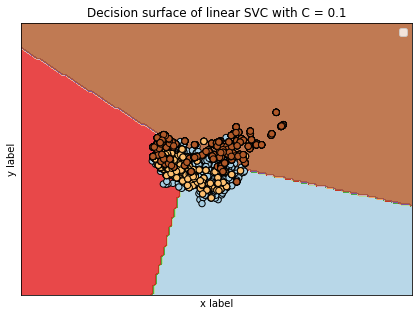

In [8]:
X1 = scaler.fit_transform(X)
fig, ax = plt.subplots(figsize=(7,5))
title = ('Decision surface of linear SVC with C = 0.1')
X0, X1 = X1[:, 0], X1[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf1, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=40, edgecolors='k')
ax.set_ylabel('y label')
ax.set_xlabel('x label')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

# **Linear SVM training model with C=1**

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
clf2 = SVC(kernel='linear', C = 1)

clf2.fit(x_train, y_train)

y_pred_train2 = clf2.predict(x_train)
print('Accuracy:', accuracy_score(y_train,y_pred_train2))

y_pred_test2 = clf2.predict(x_test)
print('\nAccuracy:', accuracy_score(y_test,y_pred_test2))

Accuracy: 0.6825899280575539

Accuracy: 0.6731543624161074


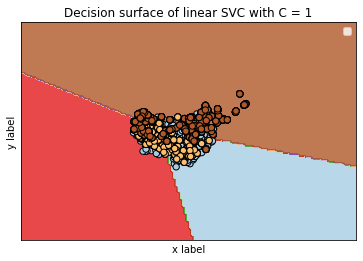

In [10]:
X1 = scaler.fit_transform(X)
fig, ax = plt.subplots()
title = ('Decision surface of linear SVC with C = 1')
X0, X1 = X1[:, 0], X1[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf2, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=40, edgecolors='k')
ax.set_ylabel('y label')
ax.set_xlabel('x label')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

# **Linear SVM training model with C=10**

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

clf3 = SVC(kernel = 'linear', C = 10)

clf3.fit(x_train, y_train)

y_pred_train3 = clf3.predict(x_train)
print('Accuracy:', accuracy_score(y_train,y_pred_train3))

y_pred_test3 = clf3.predict(x_test)
print('\nAccuracy:', accuracy_score(y_test,y_pred_test3))

Accuracy: 0.6753956834532374

Accuracy: 0.6785234899328859


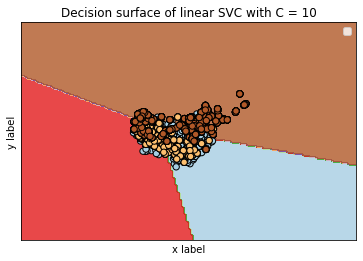

In [12]:
X1 = scaler.fit_transform(X)

fig, ax = plt.subplots()
title = ('Decision surface of linear SVC with C = 10')
X0, X1 = X1[:, 0], X1[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf3, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=40, edgecolors='k')
ax.set_ylabel('y label')
ax.set_xlabel('x label')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

# **Linear SVM training model with C=100**

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

clf4 = SVC(kernel = 'linear', C = 100)

clf4.fit(x_train, y_train)

y_pred_train4 = clf4.predict(x_train)
print('Accuracy:', accuracy_score(y_train, y_pred_train4))

y_pred_test4 = clf4.predict(x_test)
print('\nAccuracy:', accuracy_score(y_test, y_pred_test4))

Accuracy: 0.6805755395683454

Accuracy: 0.6704697986577182


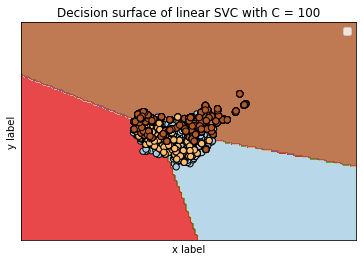

In [14]:
X1 = scaler.fit_transform(X)

fig, ax = plt.subplots()
title = ('Decision surface of linear SVC with C = 100')
X0, X1 = X1[:, 0], X1[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf4, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=40, edgecolors='k')
ax.set_ylabel('y label')
ax.set_xlabel('x label')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

# **Polynomial SVM training model with C=1**

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

svm_poly1 = SVC(kernel='poly', C=1, degree=2)
svm_poly1.fit(x_train, y_train)
print("Accuracy:", svm_poly1.score(x_train, y_train))

Accuracy: 0.7044604316546763


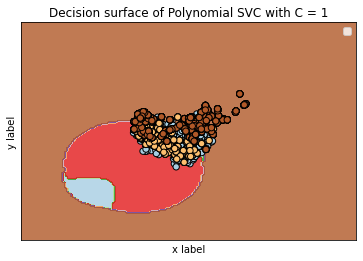

In [16]:
X1 = scaler.fit_transform(X)

fig, ax = plt.subplots()
title = ('Decision surface of Polynomial SVC with C = 1')
X0, X1 = X1[:, 0], X1[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, svm_poly1, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=40, edgecolors='k')
ax.set_ylabel('y label')
ax.set_xlabel('x label')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

# **Polynomial SVM training model with C=100**

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

svm_poly2 = SVC(kernel='poly', C=100, degree=2)
svm_poly2.fit(x_train, y_train)
print("Accuracy:", svm_poly2.score(x_train, y_train))

Accuracy: 0.7113669064748201


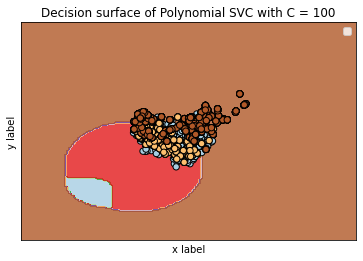

In [18]:
X1 = scaler.fit_transform(X)

fig, ax = plt.subplots()
title = ('Decision surface of Polynomial SVC with C = 100')
X0, X1 = X1[:, 0], X1[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, svm_poly2, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=40, edgecolors='k')
ax.set_ylabel('y label')
ax.set_xlabel('x label')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()